In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 6
sns.set_style('darkgrid')

In [53]:
df = pd.read_csv('training.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,8712.598425,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,8627.952756,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,8801.181102,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,8635.826772,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,8664.370079,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


In [54]:
df.columns

Index(['surface_x', 'surface_y', 'bh_x', 'bh_y', 'standardized_operator_name',
       'gross_perforated_length', 'number_of_stages', 'total_proppant',
       'total_fluid', 'true_vertical_depth', 'ffs_frac_type',
       'proppant_intensity', 'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship', 'frac_type',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

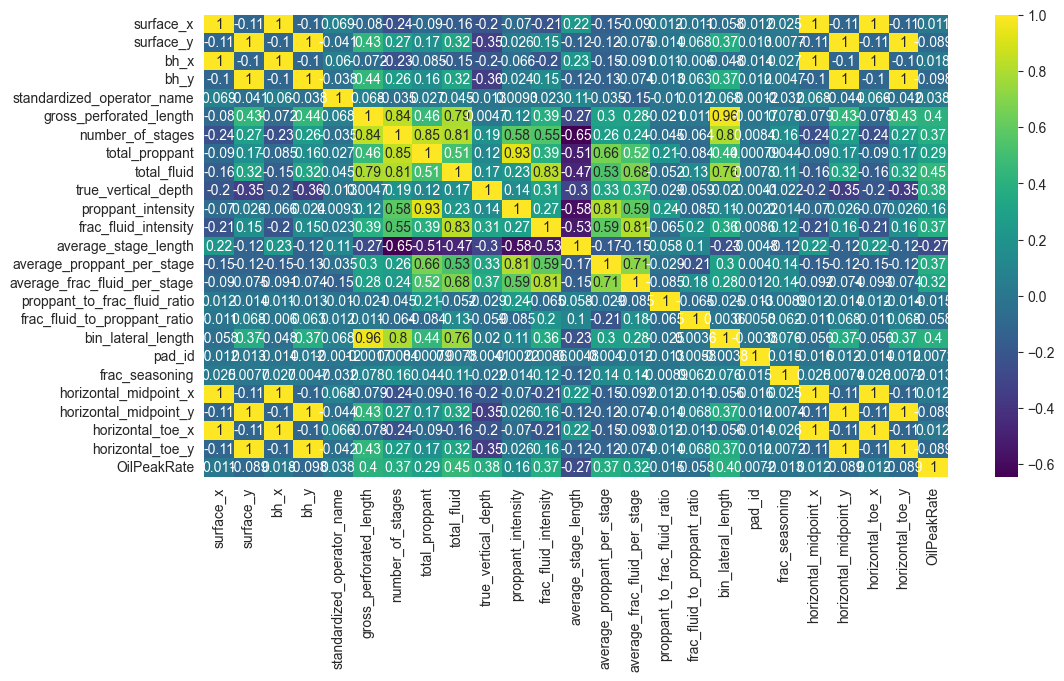

In [55]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
sns.heatmap(newdf.corr(), annot=True, cmap='viridis')
plt.show()

In [56]:
df.shape

(29692, 30)

In [ ]:
df.describe()

In [57]:
df.value_counts()

surface_x     surface_y     bh_x          bh_y          standardized_operator_name  gross_perforated_length  number_of_stages  total_proppant  total_fluid   true_vertical_depth  ffs_frac_type                proppant_intensity  frac_fluid_intensity  average_stage_length  average_proppant_per_stage  average_frac_fluid_per_stage  proppant_to_frac_fluid_ratio  frac_fluid_to_proppant_ratio  bin_lateral_length  pad_id  relative_well_position  batch_frac_classification  well_family_relationship  frac_type     frac_seasoning  horizontal_midpoint_x  horizontal_midpoint_y  horizontal_toe_x  horizontal_toe_y  OilPeakRate
6.309095e+05  1.177457e+06  6.361129e+05  1.179254e+06  1147                        4736.220472              25.0              738744.2857     4.258587e+06  7328.740157          Slickwater Crosslink Hybrid  155.977597          899.153091            189.448819            29549.77143                 170343.49110                  0.173472                      5.764630               

In [58]:
df.isnull().sum()

surface_x                           0
surface_y                           0
bh_x                             2087
bh_y                             2087
standardized_operator_name          0
gross_perforated_length          7557
number_of_stages                26940
total_proppant                  10612
total_fluid                     10616
true_vertical_depth              1495
ffs_frac_type                   15107
proppant_intensity              10721
frac_fluid_intensity            10746
average_stage_length            26968
average_proppant_per_stage      27003
average_frac_fluid_per_stage    27005
proppant_to_frac_fluid_ratio    11036
frac_fluid_to_proppant_ratio    11036
bin_lateral_length               7557
pad_id                              0
relative_well_position           9225
batch_frac_classification        9225
well_family_relationship         9225
frac_type                           0
frac_seasoning                  14924
horizontal_midpoint_x            1001
horizontal_m

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     29692 non-null  float64
 1   surface_y                     29692 non-null  float64
 2   bh_x                          27605 non-null  float64
 3   bh_y                          27605 non-null  float64
 4   standardized_operator_name    29692 non-null  int64  
 5   gross_perforated_length       22135 non-null  float64
 6   number_of_stages              2752 non-null   float64
 7   total_proppant                19080 non-null  float64
 8   total_fluid                   19076 non-null  float64
 9   true_vertical_depth           28197 non-null  float64
 10  ffs_frac_type                 14585 non-null  object 
 11  proppant_intensity            18971 non-null  float64
 12  frac_fluid_intensity          18946 non-null  float64
 13  a

In [61]:
df['drift(distance formula)'] = ((df['bh_x']-df['surface_x'])**2+(df['bh_y']-df['surface_y'])**2)**0.5
df = df.drop(['bh_x', 'bh_y', 'surface_y', 'surface_x'], axis=1)
df.head()
df.dropna(subset=['OilPeakRate'], inplace=True)

df = pd.get_dummies(df, drop_first=True)
X = df.drop('OilPeakRate', axis=1)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y = df['OilPeakRate']

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

features = df.drop('OilPeakRate', axis=1).columns
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
search = GridSearchCV(pipeline, {'lasso__alpha': np.arange(0.1, 3, 0.1)}, cv=5, scoring='neg_mean_squared_error', verbose=3)
search.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .............lasso__alpha=0.1;, score=-42671.843 total time=   2.1s
[CV 2/5] END .............lasso__alpha=0.1;, score=-14023.217 total time=   7.1s
[CV 3/5] END .............lasso__alpha=0.1;, score=-13310.220 total time=   7.2s
[CV 4/5] END .............lasso__alpha=0.1;, score=-15898.191 total time=  11.4s
[CV 5/5] END .............lasso__alpha=0.1;, score=-14573.390 total time=  12.8s
[CV 1/5] END .............lasso__alpha=0.2;, score=-43400.399 total time=   1.2s
[CV 2/5] END .............lasso__alpha=0.2;, score=-14020.434 total time=   6.4s
[CV 3/5] END .............lasso__alpha=0.2;, score=-13306.057 total time=  11.0s
[CV 4/5] END .............lasso__alpha=0.2;, score=-15907.854 total time=  15.3s
[CV 5/5] END .............lasso__alpha=0.2;, score=-14597.628 total time=  17.1s
[CV 1/5] END lasso__alpha=0.30000000000000004;, score=-43217.283 total time=   1.7s
[CV 2/5] END lasso__alpha=0.3000000000000000

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [72]:
coef = search.best_estimator_[2].coef_

In [74]:
np.array(features)[coef == 0]

array(['proppant_to_frac_fluid_ratio', 'horizontal_toe_y'], dtype=object)